<a href="https://colab.research.google.com/github/frankbass3/Graph-Neural-Networks/blob/main/spectral_clustering_with_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from networkx import (
    les_miserables_graph,
    spring_layout, draw_networkx_nodes, draw_networkx_edges, draw_networkx_labels,
    set_node_attributes,
    write_edgelist,
    to_numpy_matrix
)
import matplotlib.pyplot as plt
from csv import DictWriter
import numpy as np


input_graph = les_miserables_graph()
plt.figure(dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

(-0.8774185367963867,
 1.0231736612674707,
 -0.7551235022091722,
 1.0884831277261713)

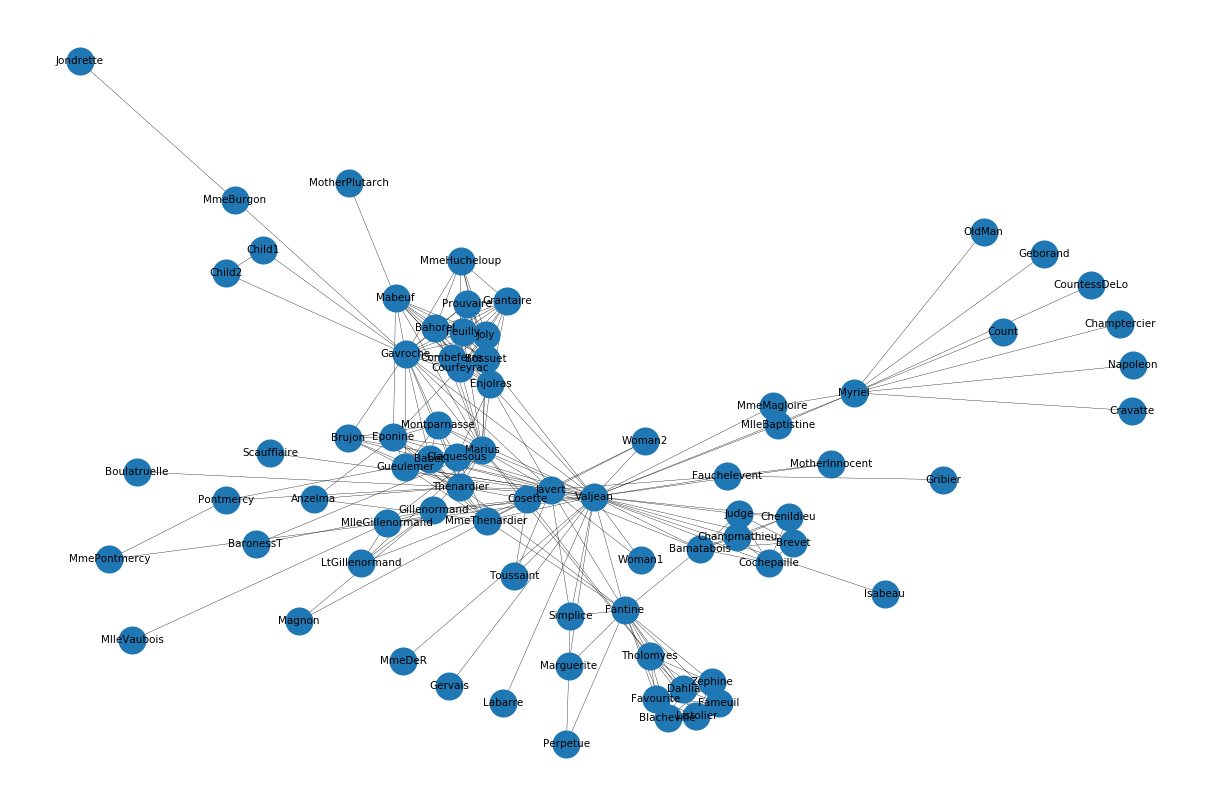

In [ ]:
plt.figure(dpi=250)
pos = spring_layout(input_graph, k=.5, iterations=500)

labels={}
for label in input_graph.nodes:
    labels[label] = label
draw_networkx_nodes(input_graph, pos, node_size=50)
draw_networkx_edges(input_graph, pos, width=.1)

draw_networkx_labels(input_graph, pos, labels=labels, font_size=3)
plt.axis('off')

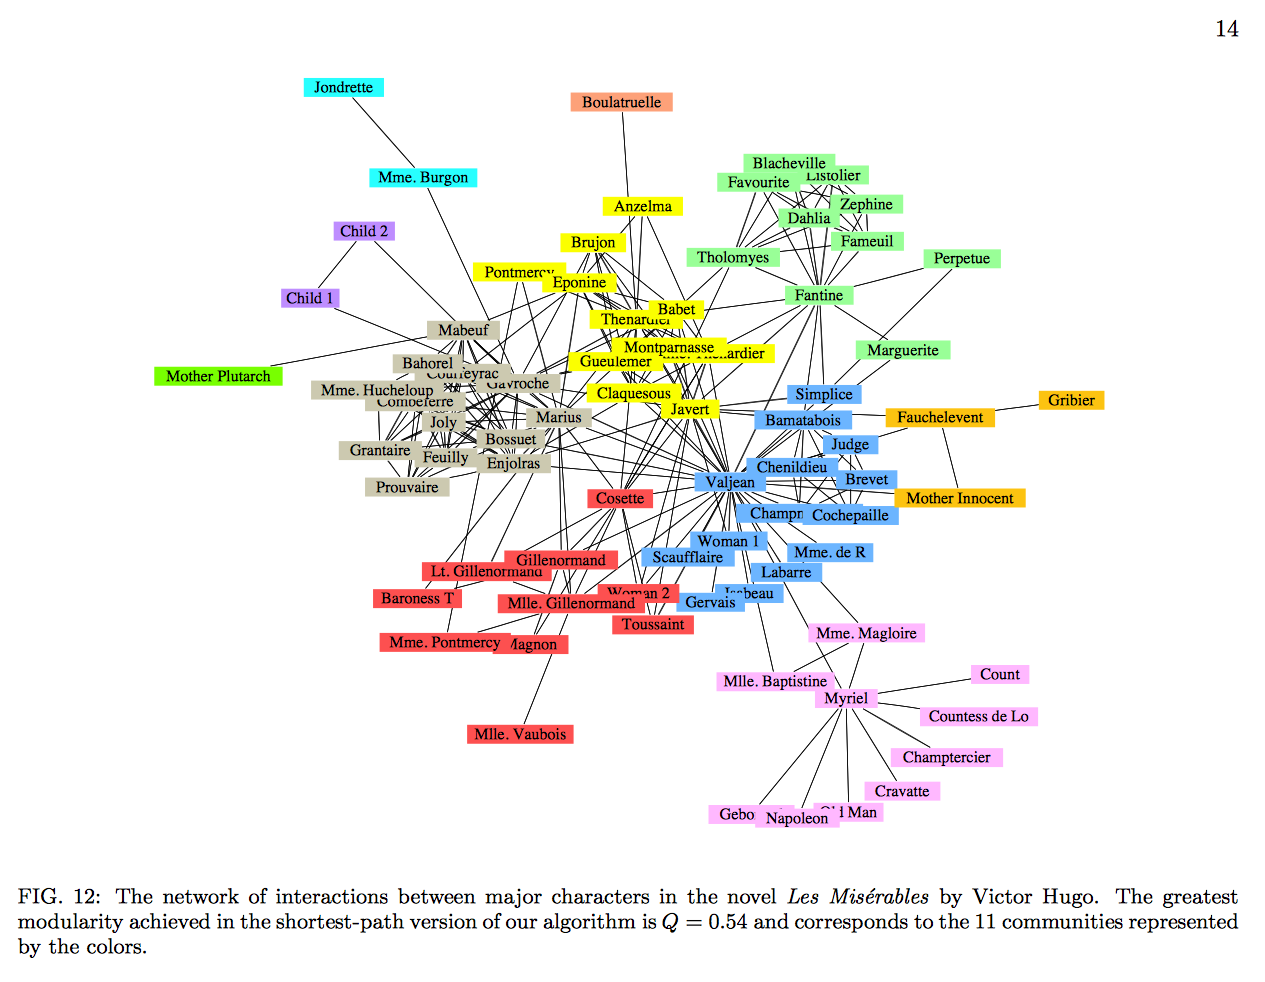

In [ ]:
# a good clustering of the novel characters is shown in this picture
from IPython.display import Image
Image("http://web.madstudio.northwestern.edu/wp-content/uploads/2015/03/NewmanGirvan2003Paper-Page14.png")

In [ ]:
order = list(input_graph.nodes())

# A adiacency matrix
A = to_numpy_matrix(input_graph, nodelist=order)
# I identity matrix
I = np.eye(input_graph.number_of_nodes())
# A_hat 
A_hat = A + I




In [ ]:
def compute_normalized_Laplacian(adjacentMatrix):
    # compute the Degree Matrix: D=sum(A)
    # degreeMatrix = np.sum(adjacentMatrix, axis=0)
    #Degree matrix
    degreeMatrix = np.array(np.sum(A_hat, axis=0))[0]
    # degreeMatrix = np.matrix(np.diag(degreeMatrix))
    print(degreeMatrix.shape)

    # compute the Laplacian Matrix: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # print laplacianMatrix

    # normalize
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [ ]:
print(A_hat.shape)
# Laplacian
Laplacian = compute_normalized_Laplacian(A_hat)

(77, 77)
(77,)


In [ ]:
from sklearn.cluster import KMeans
eigen_values, eigen_vectors = np.linalg.eig(Laplacian)

eigen_values = zip(eigen_values, range(len(eigen_values)))
eigen_values = sorted(eigen_values, key=lambda eigen_values:eigen_values[0])

sorted_index = [pair[1] for pair in eigen_values]
k_clusters = 11
print(sorted_index[1:k_clusters])

selected_eigen_vectors = eigen_vectors[:, sorted_index[1:k_clusters]]
clustering = KMeans(n_clusters=k_clusters, max_iter=500).fit(selected_eigen_vectors).labels_

#sp_cluster should be a value for each cluster with the lable of the cluster form 0 to 1 (because 2 clusters)
# spectral = []
# m = len(eigen_vectors)
# n = len(eigen_vectors[0])
# clustering = np.array([1 if eigen_vectors[j,sorted_index[1]] > 0 else 0  for j in range(len(eigen_vectors))])


print(selected_eigen_vectors.shape)
print(clustering)

[1, 2, 3, 4, 5, 6, 7, 8, 12, 13]
(77, 10)
[ 8  8  8  8  8  8  8  8  8  8  3  3  3  3  3  3  2  2  2  2  2  2  2  2
  6  6 10  3  9  5  3  3  3  3  5  5  5  5  5  4  6  6  6  3  9  9  1  1
  0 10 10 10  4 10 10 10 10  0  0  0  0  0  0  0  0  0  0  0  6  6  6  6
  3  7  7  6  0]


(-0.9018035399997504,
 1.0937482175598658,
 -0.6386960754399876,
 0.5445877923280251)

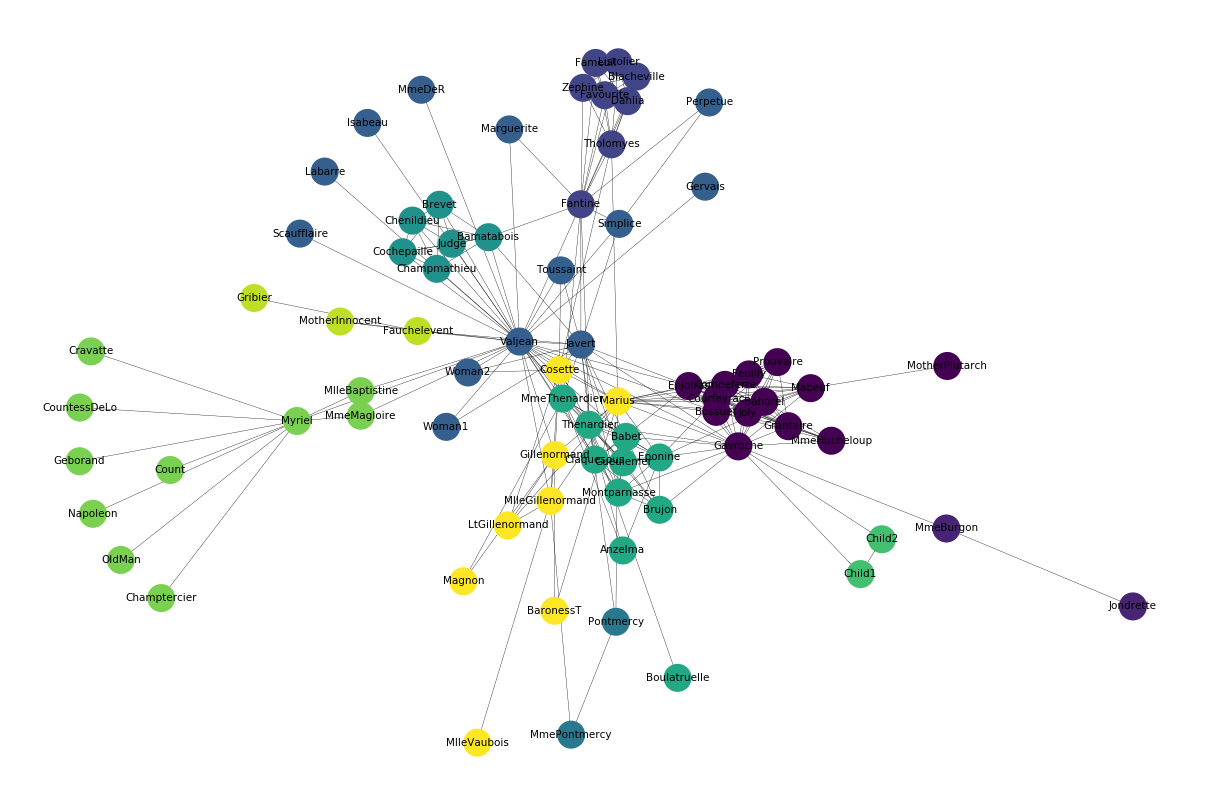

In [ ]:
plt.figure(dpi=250)
nodes_position = spring_layout(input_graph, k=.5, iterations=500)

labels={}
node_to_cluster = {}
for i,label in enumerate(input_graph.nodes):
    labels[label] = label
    node_to_cluster[label] = clustering[i]
draw_networkx_nodes(input_graph, nodes_position, node_size=50,node_color=clustering)
draw_networkx_edges(input_graph, nodes_position, width=.1)

draw_networkx_labels(input_graph, nodes_position, labels=labels, font_size=3)
plt.axis('off')